In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# e is 2600 masl, 90% rh, 10 ºC
# d is 3200 masl, 90% rh, 0 ºC
# d is 3200 masl, 30% rh, 0 ºC


In [8]:
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=16, usetex=True)

In [3]:
freq=np.loadtxt('freq.txt')/1.e9
ope=10**np.loadtxt('e.txt')
opc=10**np.loadtxt('c.txt')
opd=10**np.loadtxt('d.txt')

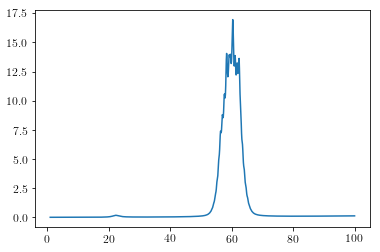

In [4]:
plt.plot(freq,ope)

In [23]:
tauke=(ope[freq<25]).max()

In [24]:
taukc=(opc[freq<25]).max()

In [28]:
taukd=(opd[freq<25]).max()

In [30]:
pwve=tauke*134-1.71

In [31]:
pwvc=taukc*134-1.71

In [32]:
pwvd=taukd*134-1.71

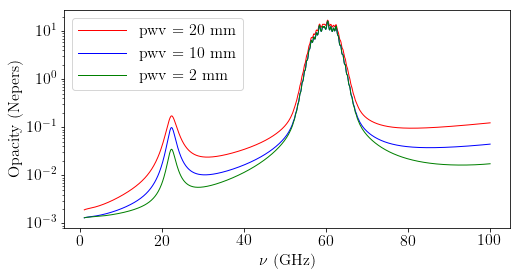

In [45]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)

line, = ax.plot(freq,ope, color='red', lw=1,label='pwv = '+str(int(pwve)-1)+' mm')
line, = ax.plot(freq,opd, color='blue', lw=1,label='pwv = '+str(int(pwvd)-1)+' mm')
line, = ax.plot(freq,opc, color='green', lw=1,label='pwv = '+str(int(pwvc))+' mm')
ax.legend()
ax.set_yscale('log')
ax.set_xlabel(r'\nu\ \mathrm{(GHz)}')
ax.set_ylabel('Opacity (Nepers)')
plt.savefig("opac.pdf",dpi=300)



In [ ]:
# CASA session
from asap import opacity
import numpy as np
import matplotlib.pyplot as plt
c=opacity.model(273.,62500.,0.3,3200.)
d=opacity.model(273.,62500.,0.9,3200.)
e=opacity.model(285.,72500.,0.9,2600.)
freq=np.linspace(1e9,100e9,1000)
opc=np.log10(100*np.array([c.get_opacities(i) for i in freq])*.01)
ope=np.log10(100*np.array([e.get_opacities(i) for i in freq])*0.01)
np.savetxt('e.txt',ope)
np.savetxt('c.txt',opc)
np.savetxt('freq.txt',freq)
opd=np.log10(100*np.array([d.get_opacities(i) for i in freq])*.01)
np.savetxt('d.txt',opd)